## Definition of the Aerosol Optical Depth in terms of Angstrom Exponents

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The authors of RRTM_SW use the following equation to determine the aerosol optical depth (AOD) at a given wavelength based on the optical depth at a reference wavelength (1 micron in RRTM_SW):

$$ AOD(\lambda) = \frac{ AOD(\lambda_{ref}) * (a_1 + a_2 * [\frac{\lambda}{\lambda_{ref}}]) } {[(a_1 + a_2 -1) + [\frac{\lambda}{\lambda_{ref}}]^{a_0} } $$

Note that this formula contains three "fit parameters", $a_0$, $a_1$, and $a_2$, which allows one to describe a 2nd-order (parabolic) dependence of the AOD on wavelength.


In [8]:
import numpy as np

In [62]:
AERPAR      = np.array([2.184, 1.00, 0.00])
wavelength  = np.arange(0.2, 3, 0.01)
wavelength1 = 1.0
#AOD1        = 0.046  # Total AOD = 0.25
#AOD1        = 0.092  # Total AOD = 0.5
AOD1        = 0.184  # Total AOD = 1.0

In [63]:
specAOD = AOD1 * (AERPAR[1] + AERPAR[2] * (wavelength/wavelength1)) / ((AERPAR[1] + AERPAR[2] - 1) + (wavelength/wavelength1)**AERPAR[0])

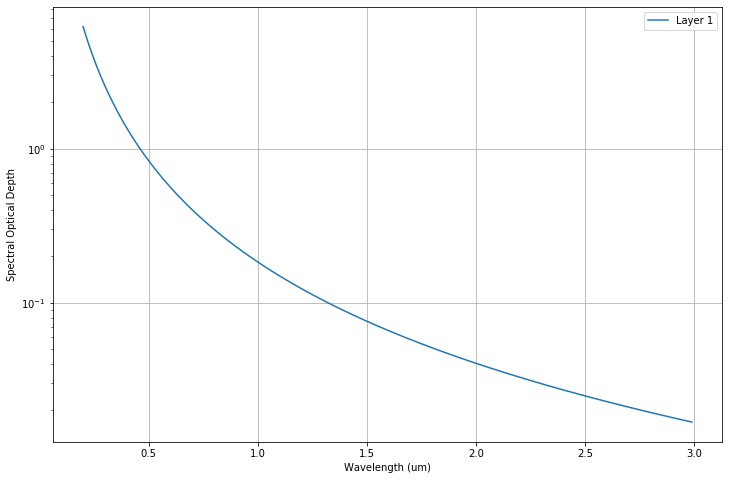

In [64]:
figure(figsize=(12,8))
semilogy(wavelength, specAOD)
grid()
xlabel('Wavelength (um)')
ylabel('Spectral Optical Depth')
legend(['Layer 1', 'Layer 2', 'Layer 3', 'Layer 4'], loc='best')

In [68]:
AOD = trapz(specAOD, wavelength)
print('The spectrally-integrated aerosol optical depth is %6.2f ' % AOD)

The spectrally-integrated aerosol optical depth is   1.00 
